LA Y AURA PLEINS DE TEXTE STYLE

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

from scipy import stats

from sklearn.model_selection import train_test_split

import ipywidgets as widgets



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


1 - Importation de la base de donnée sous un DataFrame : 

---



In [ ]:
df_data = pd.read_csv ("/content/gdrive/My Drive/Colab Notebooks/telecom_churn_data.csv")

df_data.head()
df_data.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,...,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


In [ ]:
df_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


2 - Récupération des variables numériques :
  - 214 variables
  - 99999 observations

In [ ]:
print("Old shape : ", df_data.shape)
df_data = df_data.select_dtypes(["number"])
print("New shape : ", df_data.shape)

Old shape :  (99999, 226)
New shape :  (99999, 214)


3 - Suppression des doublons en fonction des numéros de téléphones :
  - Aucun trouvé

4 - Suppression des variables qui sont des constantes (aucune importance pour la prédiction) : 
  - circle_id
  - loc_og_t2o_mou
  - std_og_t2o_mou
  - loc_ic_t2o_mou
  
Donc : 
  - 210 variables
  - 99999 observations



In [ ]:
## Suppression des doublons 
print("Old shape : ", df_data.shape)
df_data.drop_duplicates(subset=["mobile_number"], keep="first")
print("New shape /w doublons : ", df_data.shape)


#Suppressions des variables qui sont des constantes 
del df_data['circle_id']
del df_data['loc_og_t2o_mou']
del df_data['std_og_t2o_mou']
del df_data['loc_ic_t2o_mou']
print("New shape /w variables constantes : ", df_data.shape)

Old shape :  (99999, 214)
New shape /w doublons :  (99999, 214)
New shape /w variables constantes :  (99999, 210)


5 - Transformations des NA : 

In [ ]:
def is_binary(list_binary, nom_column):
  if(nom_column in list_binary):
    print(nom_column)
    return True
  else :
    return False



print("Old shape : ", df_data.shape)

missing_rate = df_data.isna().sum()/df_data.shape[0]
#print(missing_rate)

nom_column = df_data.columns.tolist()
colomn_del = []
valeur_del = []

list_binary = df_data.columns[df_data.isin([0,1, float('nan')]).all()]
print(list_binary + " est binaire")

for i in range(0, len(missing_rate)) : 
  if(missing_rate[i] > 0.1):
    valeur_del.append(missing_rate[i])
    colomn_del.append(nom_column[i])
    df_data.drop(nom_column[i], axis=1, inplace=True)
  else:
    if(is_binary(list_binary, nom_column[i])):
      df_data.fillna(0, inplace=True)
    else :
      df_data.fillna(df_data[nom_column[i]].median(), inplace=True)

print(colomn_del)
print(valeur_del)
print(df_data.isna().sum().sum())


print("New shape : ", df_data.shape)

Old shape :  (99999, 210)
Index(['std_og_t2c_mou_6 est binaire', 'std_og_t2c_mou_7 est binaire',
       'std_og_t2c_mou_8 est binaire', 'std_og_t2c_mou_9 est binaire',
       'std_ic_t2o_mou_6 est binaire', 'std_ic_t2o_mou_7 est binaire',
       'std_ic_t2o_mou_8 est binaire', 'std_ic_t2o_mou_9 est binaire',
       'night_pck_user_6 est binaire', 'night_pck_user_7 est binaire',
       'night_pck_user_8 est binaire', 'night_pck_user_9 est binaire',
       'fb_user_6 est binaire', 'fb_user_7 est binaire',
       'fb_user_8 est binaire', 'fb_user_9 est binaire'],
      dtype='object')
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9
['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 

In [ ]:
def outliers(df, nom_column):
  
  #Q1 = df[nom_column].quantile(0.25)
  #Q3 = df[nom_column].quantile(0.75)

  Q1 = df[nom_column].mean() - 2 * df[nom_column].std()
  Q3 = df[nom_column].mean() + 2 * df[nom_column].std()
  IQR = Q3 - Q1

  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  
  ls = df.index[ (df[nom_column] < lb) | (df[nom_column] > ub)]
  print(len(ls))
  
  return ls

def remove(df, list_to_del):
  list_to_del = sorted(set(list_to_del))
  df = df.drop(list_to_del)
  return df

print("Old shape : ", df_data.shape)
nom_column = df_data.columns.tolist()
index_list = []

list_binary = df_data.columns[df_data.isin([0,1, float('nan')]).all()]
print(list_binary + " est binaire")

for element in nom_column :
  if(is_binary(list_binary, element)==False):
    index_list.extend(outliers(df_data, element))
    index_list = list(set(index_list))
print(index_list)
print(len(index_list))

#NE PAS RUN CA CA FONCTIONNE PAS ET CA CASSE LLA SUITE 
df_data = remove(df_data, index_list)

print("New shape : ", df_data.shape)

Old shape :  (99999, 174)
Index([], dtype='object')
0
80
80
74
69
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
129
134
126
125
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
169
169
170
160
0
0
0
0
0
0
0
0
0
0
0
0
85
90
77
82
87
79
70
70
89
89
71
67
231
224
219
187
256
285
279
251
202
236
217
221
35
40
47
39
216
205
212
140
376
167
166
147
260
225
248
233
0
247
262
254
266
[73729, 8194, 6, 7, 98317, 24589, 81936, 32784, 57360, 49179, 40990, 8223, 57375, 33, 8227, 16420, 90149, 49190, 90150, 57384, 24617, 24615, 73771, 49196, 57390, 8239, 98351, 8241, 49201, 49203, 90164, 24630, 41015, 90168, 32824, 57, 16440, 16441, 56, 81982, 41023, 32833, 41027, 8261, 57414, 73, 90187, 73813, 73814, 41047, 32859, 41053, 98397, 8294, 8295, 49254, 57452, 73838, 41070, 16494, 41075, 41078, 16503, 57463, 73846, 41082, 82047, 32899, 57475, 24708, 82055, 57480, 98441, 24714, 90249, 65676, 165

Dropdown(options=('mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onne…

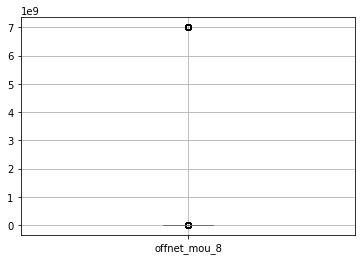

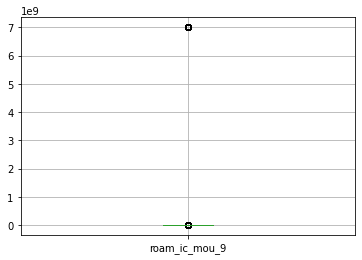

In [ ]:
nom_column = df_data.columns.tolist()
dropdown_nom_column = widgets.Dropdown(options = nom_column)
output_boxplot = widgets.Output()

def dropdown_eventhandler(change):
  output_boxplot.clear_output()
  with output_boxplot:
    display(df_data.boxplot(column=dropdown_nom_column.value, return_type='axes'))

dropdown_nom_column.observe(dropdown_eventhandler, names="value")
display(dropdown_nom_column)

In [ ]:
conditions = [ 
  (df_data['total_ic_mou_9'] == 0) & 
  (df_data['total_og_mou_9'] == 0) &
  (df_data['vol_2g_mb_9'] == 0) &
  (df_data['vol_3g_mb_9'] == 0),

  (df_data['total_ic_mou_9'] >= 1) | 
  (df_data['total_og_mou_9'] >= 1) &
  (df_data['vol_2g_mb_9'] >= 1) |
  (df_data['vol_3g_mb_9'] >= 1)

]

values = [1,0]

df_data['churner'] = np.select(conditions, values)

df_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
0,7000842753,197.385,214.816,213.803,21.100,7.001205e+09,7.001205e+09,0.00,7.001205e+09,7.001205e+09,...,0,0,0,0,968,30.4,0.0,101.20,3.58,1
1,7001865778,34.047,355.074,268.321,86.285,2.411000e+01,7.868000e+01,7.68,1.834000e+01,1.574000e+01,...,0,0,0,0,1006,0.0,0.0,0.00,0.00,0
2,7001625959,167.690,189.058,210.226,290.714,1.154000e+01,5.524000e+01,37.26,7.481000e+01,1.433300e+02,...,0,0,0,0,1103,0.0,0.0,4.17,0.00,0
3,7001204172,221.338,251.102,508.054,389.500,9.991000e+01,5.439000e+01,310.98,2.417100e+02,1.233100e+02,...,0,0,0,0,2491,0.0,0.0,0.00,0.00,0
4,7000142493,261.636,309.876,238.174,163.426,5.031000e+01,1.494400e+02,83.89,5.878000e+01,7.696000e+01,...,0,0,0,0,1526,0.0,0.0,0.00,0.00,0


In [ ]:
nbrun = np.sum(df_data['churner'] == 1 )
print(nbrun)
nbrO = np.sum(df_data['churner'] == 0)
print(nbrO)

10021
87666


In [ ]:
print("Old shape : ", df_data.shape)
list_name = df_data.columns.tolist()
list_to_del = [var_name for var_name in list_name if var_name[-2:] == "_9"]
print(list_to_del)
print(len(list_to_del))
df_data.drop(list_to_del, 1, inplace=True)

print("New shape : ", df_data.shape)

Old shape :  (97687, 175)
['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']
42
New shape :  (97687, 133)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
trainset, testset = train_test_split(df_data, test_size=0.2, random_state=0)

print(trainset.shape, testset.shape)

nbrun = np.sum(trainset['churner'] == 1 )
nbrO = np.sum(trainset['churner'] == 0)
print(nbrun)
print(nbrO)
nbrun = np.sum(testset['churner'] == 1 )
nbrO = np.sum(testset['churner'] == 0)
print(nbrun)
print(nbrO)

(78149, 133) (19538, 133)
8045
70104
1976
17562


In [ ]:
trainset.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
10382,7001983532,100.498,82.600,33.599,41.94,34.13,20.81,81.58,43.49,26.76,...,0,0,0,0,1842,0.00,0.00,0.00,0.00,0
73170,7000611373,157.536,239.603,276.519,44.21,72.54,135.99,99.96,142.84,105.78,...,0,0,0,0,1423,0.00,0.00,0.00,0.00,0
30938,7001516202,1745.761,1790.522,2326.899,316.41,249.68,253.04,530.46,784.98,720.68,...,0,0,0,1,250,497.84,73.79,32.36,42.69,0
99309,7002327120,319.636,416.262,226.704,32.64,11.89,4.11,42.08,20.59,18.28,...,1,0,0,0,1473,462.41,697.34,630.15,0.00,0
58959,7002071190,81.522,105.932,182.620,11.69,61.56,59.71,22.18,26.21,45.98,...,0,0,0,0,2423,0.00,0.00,0.00,0.00,0


In [ ]:
testset.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
3582,7002321808,275.482,492.990,580.982,220.78,483.09,6.925900e+02,16.36,156.11,2.789000e+01,...,0,0,0,0,860,0.0,0.0,0.0,0.0,0
60498,7002006298,104.390,202.225,0.000,18.51,14.51,7.001205e+09,81.86,110.71,7.001205e+09,...,0,0,0,0,410,0.0,0.0,0.0,0.0,1
53227,7002358170,130.871,149.752,155.070,20.54,50.59,9.659000e+01,120.09,196.93,1.825600e+02,...,0,0,0,0,622,0.0,0.0,0.0,0.0,0
21333,7000649592,86.850,55.203,28.261,15.63,10.81,6.630000e+00,69.29,37.46,1.846000e+01,...,0,0,0,0,652,0.0,0.0,0.0,0.0,0
3885,7000751776,84.544,4.350,70.984,20.98,0.35,1.584000e+01,113.09,4.19,5.696000e+01,...,0,0,0,0,1023,0.0,0.0,0.0,0.0,0


In [ ]:
file_name_test = "churner_test_data_set.csv"

file_name_train = "churner_train_data_set.csv"

trainset.to_csv(file_name_train, index=False)
testset.to_csv(file_name_test, index=False)

files.download(file_name_test)
files.download(file_name_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

:Ajout de rpy2 (https://rpy2.github.io/ ) pour centraliser le code R.

Echec de cette méthode : l'installation de librairies hors CRAN nécessite un accès console disponible uniquement par Google Collab Pro+ 




In [ ]:
#%load_ext rpy2.ipython

On ajoute les jeux de données et les librairies R.

In [ ]:
#%%R 

#import jeux
#system("gdown --id 1TwRb5T9oKq5qKcH6w5vKlL41PXaWHCZh")
#system("gdown --id 1aKU1uUDDbQ2RWK1MAV9BhGWykf1cXyXd")
#install.packages('FactoMineR')
#install.packages('factoextra')
#train<-read.csv(file="churner_train_data_set.csv",header=TRUE,sep=",")
#head(train)
#test<-read.csv(file="churner_test_data_set.csv",header=TRUE,sep=",")
#head(test)

# ACP + SVM
Cette partie a aussi été codé sur R,
en effet, nous souhaitons augmenter nos compétences sur tout les suppports possibles

(Source de cette partie : https://www.analyticsvidhya.com/blog/2021/07/svm-and-pca-tutorial-for-beginners/ )

In [ ]:
#librairie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

On remarque un faible taux de client qui va résilier.

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


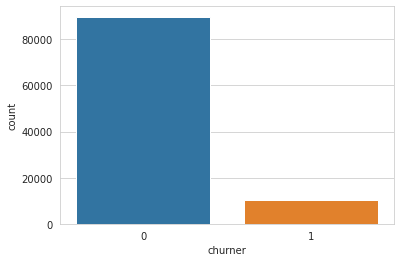

In [ ]:
sns.countplot(df_data['churner'], label = "Count")

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df_data.drop('churner', axis=1)
y = df_data.churner
print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (99999, 132)
'y' shape: (99999,)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

A moi : faire boucle de Tune de SVM comme sur R.
avec test de chaque méthode & noyau

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Train Result:n================================================
Accuracy Score: 92.59%
_______________________________________________
CLASSIFICATION REPORT:n                      0            1  accuracy     macro avg  weighted avg
precision      0.938971     0.722498  0.925899      0.830735      0.917113
recall         0.981361     0.432088  0.925899      0.706724      0.925899
f1-score       0.959698     0.540770  0.925899      0.750234      0.917398
support    62931.000000  7068.000000  0.925899  69999.000000  69999.000000
_______________________________________________
Confusion Matrix: n [[61758  1173]
 [ 4014  3054]]n
Test Result:n================================================
Accuracy Score: 92.24%
_______________________________________________
CLASSIFICATION REPORT:n                      0            1  accuracy     macro avg  weighted avg
precision      0.936026     0.715368  0.922433      0.825697      0.913055
recall         0.980429     0.423311  0.922433      0.701870  

## SVM sur ACP

In [ ]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=24)
scaler = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

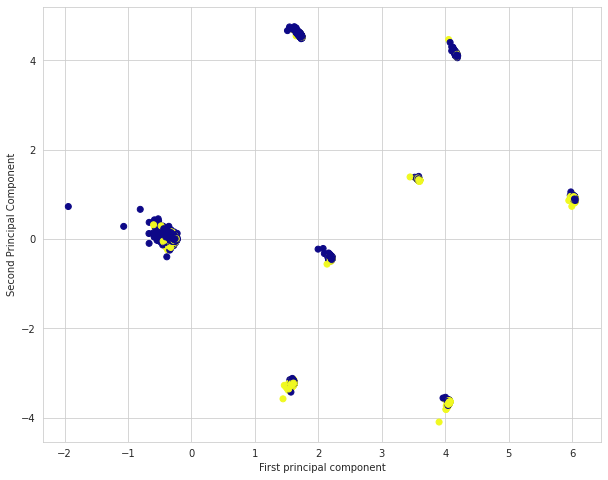

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Copier coller la fonction de test de tout les type et kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 
              
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


In [ ]:
import mitosheet
mitosheet.sheet()

ModuleNotFoundError: ignored

In [ ]:
df_data = df_data[df_data['total_ic_mou_9'] == 0]